In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Income data

In [2]:
all_economic = pd.read_csv("acs_5yr_est_selected_economic_characteristics_2010-2022.csv", encoding="UTF-8", sep=',', header=0, index_col=None)
all_economic

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010
...,...,...,...,...,...,...,...,...
98015,18 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),39.7%,±0.4,2021
98016,18 to 64 years,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.1%,±0.4,2021
98017,65 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),38.5%,±0.5,2021
98018,People in families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.0%,±0.4,2021


In [3]:
incomes = all_economic[all_economic["Category"].str.contains("INCOME AND BENEFITS")]
print(incomes["Category"].value_counts().sort_index())
incomes

INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)    2288
INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)    2288
Name: Category, dtype: int64


,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
56,Total households,INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Alabama,"1,821,210","±5,620","1,821,210",(X),2010
57,"Less than $10,000",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Alabama,"186,689","±2,960",10.3%,±0.2,2010
58,"$10,000 to $14,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Alabama,"130,766","±2,430",7.2%,±0.1,2010
59,"$15,000 to $24,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Alabama,"242,846","±3,336",13.3%,±0.2,2010
60,"$25,000 to $34,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Alabama,"213,143","±3,101",11.7%,±0.2,2010
...,...,...,...,...,...,...,...,...
97970,Median nonfamily income (dollars),INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTE...,Puerto Rico,"13,355",±161,(X),(X),2021
97971,Mean nonfamily income (dollars),INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTE...,Puerto Rico,"22,044",±490,(X),(X),2021
97972,Median earnings for workers (dollars),INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTE...,Puerto Rico,"17,982",±187,(X),(X),2021
97973,"Median earnings for male full-time, year-r...",INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTE...,Puerto Rico,"25,086",±278,(X),(X),2021


In [4]:
incomes = incomes[(incomes["Year"].astype(int) >= 2014) & (incomes["Year"].astype(int) <= 2022)]

In [5]:
def Gini_index(households, midpoints):
    df = pd.DataFrame({"households": households, "midpoints": midpoints})
    df['total_income'] = df['households'] * df['midpoints']
    df['cum_households'] = df['households'].cumsum()
    df['cum_income'] = df['total_income'].cumsum()
    df['cum_share_households'] = df['cum_households'] / df['households'].sum()
    df['cum_share_income'] = df['cum_income'] / df['total_income'].sum()
    df['prev_cum_share_households'] = df['cum_share_households'].shift(1, fill_value=0)
    df['prev_cum_share_income'] = df['cum_share_income'].shift(1, fill_value=0)

    df['area'] = (df['cum_share_households'] - df['prev_cum_share_households']) * (df['cum_share_income'] + df['prev_cum_share_income']) / 2

    B = df['area'].sum()
    G = 1 - 2 * B

    return G

In [6]:
gini_index_year_household = {}
gini_index_year_family = {}

income_bucket_midpoints = [5000, 12500, 20000, 30000, 42500, 62500, 87500, 125000, 175000, 250000]

for year in incomes["Year"].unique():
    household_counts = np.array([0] * len(income_bucket_midpoints))
    family_counts = np.array([0] * len(income_bucket_midpoints))
    for state in incomes["State"].unique():
        household = incomes[(incomes["State"] == state) & 
                            (incomes["Label (Grouping)"].str.contains('\$', case=False)) &
                            (incomes["Year"] == year)].iloc[:10, 3].str.replace(',', '').astype(int).to_numpy().flatten()
        family = incomes[(incomes["State"] == state) & 
                         (incomes["Label (Grouping)"].str.contains('\$', case=False)) &
                         (incomes["Year"] == year)].iloc[10:, 3].str.replace(',', '').astype(int).to_numpy().flatten()

        household_counts += household
        family_counts += family
    
    gini_index_year_household[year] = Gini_index(household_counts, income_bucket_midpoints)
    gini_index_year_family[year] = Gini_index(family_counts, income_bucket_midpoints)

In [7]:
gini_index_year_household = dict(sorted(gini_index_year_household.items(), key=lambda item: item[1]))
gini_index_year_family = dict(sorted(gini_index_year_family.items(), key=lambda item: item[1]))

print(gini_index_year_household)
print(gini_index_year_family)

{2022: 0.4174614498423411, 2021: 0.4244314530037244, 2020: 0.42895702337465025, 2019: 0.4320932446401502, 2018: 0.435399777552812, 2017: 0.4381724405009857, 2016: 0.44035895575020034, 2014: 0.44083936531854495, 2015: 0.44144793566352447}
{2022: 0.3740320468132299, 2021: 0.38308760040272627, 2020: 0.3888993530419298, 2019: 0.3932085324445659, 2018: 0.3979720633239471, 2017: 0.40199049747395565, 2016: 0.40535494128859484, 2014: 0.4070396697042691, 2015: 0.40717907310379164}


Since we only have income data from 2010 to 2022, we will use the corresponding period consumption data.

#### Load production dataset

In [8]:
production = pd.read_csv("Meat_Stats_Meat_Production.csv", encoding = "ISO-8859-1", sep=',', header=0, index_col=None)
production.drop(["Date", "Unit", "Commercial or Federally Inspected", "Type of Meat"], axis=1, inplace=True)
production["Production"] = production["Production"].str.replace(',', '').astype(float)
production = production[(production["Year"] >= 2013) & (production["Year"] <= 2022)].dropna()
production = production.groupby(["Year", "Month", "Animal"]).sum().reset_index()
production

,Year,Month,Animal,Production
0,2013,1,Beef,4489.2
1,2013,1,Broilers,3267.1
2,2013,1,Lamb and Mutton,24.1
3,2013,1,Other Chicken,46.6
4,2013,1,Pork,4117.0
...,...,...,...,...
835,2022,12,Lamb and Mutton,20.8
836,2022,12,Other Chicken,46.0
837,2022,12,Pork,4450.5
838,2022,12,Turkey,428.2


#### Load storage dataset

In [9]:
storage = pd.read_csv("Meat_Stats_Cold_Storage.csv", encoding = "ISO-8859-1", sep=',', header=0, index_col=None)
storage.drop(["Date", "Unit"], axis=1, inplace=True)
storage = storage[(storage["Year"] >= 2013) & (storage["Year"] <= 2022)].dropna()
storage["Animal"] = storage["Animal"].str.replace("Broiler", "Broilers")
storage

,Year,Month,Animal,Weight,Type_Of_Meat
12,2022,12,Beef,523.25,Red Meat
13,2022,11,Beef,510.25,Red Meat
14,2022,10,Beef,526.14,Red Meat
15,2022,9,Beef,513.79,Red Meat
16,2022,8,Beef,511.85,Red Meat
...,...,...,...,...,...
3571,2013,5,Frozen Eggs,29.34,Poultry
3572,2013,4,Frozen Eggs,27.14,Poultry
3573,2013,3,Frozen Eggs,28.62,Poultry
3574,2013,2,Frozen Eggs,29.66,Poultry


#### Combine production and storage by merging on the overlapping time points and animals

In [10]:
prod_store = pd.merge(production, storage, on=["Year", "Month", "Animal"], how="inner")
prod_store

,Year,Month,Animal,Production,Weight,Type_Of_Meat
0,2013,1,Beef,4489.2,465.72,Red Meat
1,2013,1,Broilers,3267.1,651.06,Poultry
2,2013,1,Lamb and Mutton,24.1,21.38,Red Meat
3,2013,1,Other Chicken,46.6,1.11,Poultry
4,2013,1,Pork,4117.0,551.51,Red Meat
...,...,...,...,...,...,...
835,2022,12,Lamb and Mutton,20.8,29.67,Red Meat
836,2022,12,Other Chicken,46.0,4.14,Poultry
837,2022,12,Pork,4450.5,451.60,Red Meat
838,2022,12,Turkey,428.2,140.26,Poultry


#### Aggregated consumption regardless of meat type

In [11]:
prod_store_no_meat_type = prod_store.copy()
prod_store_no_meat_type.drop(["Animal", "Type_Of_Meat"], axis=1, inplace=True)
prod_store_no_meat_type = prod_store_no_meat_type.groupby(["Year", "Month"]).sum().reset_index()
prod_store_no_meat_type

,Year,Month,Production,Weight
0,2013,1,12406.2,1992.48
1,2013,2,10745.1,2121.68
2,2013,3,11448.5,2175.43
3,2013,4,11855.6,2192.23
4,2013,5,12082.6,2354.57
...,...,...,...,...
115,2022,8,14259.2,2273.11
116,2022,9,13777.1,2323.11
117,2022,10,13997.8,2325.04
118,2022,11,13984.3,2188.01


In [12]:
prod_store_no_meat_type["Delta"] = prod_store_no_meat_type["Weight"].diff()
prod_store_no_meat_type = prod_store_no_meat_type[prod_store_no_meat_type["Year"] != 2013].reset_index(drop=True)
prod_store_no_meat_type

,Year,Month,Production,Weight,Delta
0,2014,1,12106.3,1934.21,-22.80
1,2014,2,10775.9,2018.51,84.30
2,2014,3,11151.6,2061.81,43.30
3,2014,4,11629.6,1918.18,-143.63
4,2014,5,11587.2,1953.64,35.46
...,...,...,...,...,...
103,2022,8,14259.2,2273.11,36.66
104,2022,9,13777.1,2323.11,50.00
105,2022,10,13997.8,2325.04,1.93
106,2022,11,13984.3,2188.01,-137.03


In [13]:
prod_store_no_meat_type["Consumption"] = (prod_store_no_meat_type["Production"] - prod_store_no_meat_type["Delta"]) * 0.65 * (187/471)
prod_store_no_meat_type

,Year,Month,Production,Weight,Delta,Consumption
0,2014,1,12106.3,1934.21,-22.80,3130.131858
1,2014,2,10775.9,2018.51,84.30,2759.159193
2,2014,3,11151.6,2061.81,43.30,2866.696104
3,2014,4,11629.6,1918.18,-143.63,3038.293220
4,2014,5,11587.2,1953.64,35.46,2981.133752
...,...,...,...,...,...,...
103,2022,8,14259.2,2273.11,36.66,3670.381607
104,2022,9,13777.1,2323.11,50.00,3542.524427
105,2022,10,13997.8,2325.04,1.93,3611.885347
106,2022,11,13984.3,2188.01,-137.03,3644.262551


#### CPI dataset

In [14]:
# https://www.bls.gov/cpi/data.htm

cpi_food_beverage = pd.read_csv("cu.data.11.USFoodBeverage", sep='\s+', header=0, index_col=None)
cpi_meat_poultry = cpi_food_beverage[cpi_food_beverage["series_id"] == "CUSR0000SAF112"].iloc[:, 1:4]
cpi_meat_poultry["period"] = cpi_meat_poultry["period"].str[1:].astype(int)
cpi_meat_poultry = cpi_meat_poultry[(cpi_meat_poultry["year"] >= 2014) & (cpi_meat_poultry["year"] <= 2022)].reset_index(drop=True)
cpi_meat_poultry

,year,period,value
0,2014,1,241.121
1,2014,2,243.344
2,2014,3,245.753
3,2014,4,249.377
4,2014,5,252.605
...,...,...,...
103,2022,8,318.072
104,2022,9,318.087
105,2022,10,319.688
106,2022,11,320.004


In [15]:
cpi_food_beverage[(cpi_food_beverage["value"] == 100) & (cpi_food_beverage["series_id"] == "CUSR0000SAF112")]

,series_id,year,period,value,footnote_codes
3128,CUSR0000SAF112,1984,M09,100.0,NaN


#### Physical activity & obesity dataset

In [16]:
physical_obesity = pd.read_csv("Nutrition_Physical_Activity_and_Obesity_Data.csv", sep=',', header=0, index_col=None, low_memory=False)
questions_to_consider = ["Percent of students in grades 9-12 who have obesity",
                         "Percent of students in grades 9-12 who participate in daily physical education",
                         "Percent of students in grades 9-12 who drank regular soda/pop at least one time per day",
                         "Percent of adults who engage in no leisure-time physical activity",
                         "Percent of adults aged 18 years and older who have obesity"]

states = [line.rstrip() for line in open('us_states.txt')]

physical_obesity = physical_obesity[(physical_obesity["Question"].isin(questions_to_consider)) &
                                    (physical_obesity["LocationDesc"].isin(states)) &
                                    (physical_obesity["Total"] == "Total") &
                                    (physical_obesity["YearEnd"] >= 2014) & 
                                    (physical_obesity["YearEnd"] <= 2022)]

physical_obesity = physical_obesity[["YearEnd", "LocationDesc", "Question", "Data_Value"]].reset_index(drop=True)
physical_obesity

,YearEnd,LocationDesc,Question,Data_Value
0,2019,Arizona,Percent of students in grades 9-12 who have ob...,13.3
1,2019,District of Columbia,Percent of students in grades 9-12 who have ob...,17.1
2,2019,New York,Percent of students in grades 9-12 who partici...,17.4
3,2017,North Dakota,Percent of students in grades 9-12 who have ob...,14.9
4,2015,Nevada,Percent of students in grades 9-12 who partici...,29.1
...,...,...,...,...
1253,2022,Wisconsin,Percent of adults who engage in no leisure-tim...,21.9
1254,2022,West Virginia,Percent of adults aged 18 years and older who ...,41.0
1255,2022,West Virginia,Percent of adults who engage in no leisure-tim...,30.2
1256,2022,Wyoming,Percent of adults who engage in no leisure-tim...,22.6


In [17]:
# High school graduates for each year       https://nces.ed.gov/programs/digest/d23/tables/dt23_219.20.asp
# In previous dataset, there are questions for students in grades 9-12, which correspond to high school students
# The data provided above is in percentages, so we need to convert it to actual number of students
# This can be done by: 
# If the percentage is for year n
# 1. For Grade 9 students, they will graduate in 4 years, so find the number of graduates in year n+4 to represent the number of students in Grade 9 in year n
# 2. For Grade 10 students, they will graduate in 3 years, so find the number of graduates in year n+3 to represent the number of students in Grade 10 in year n
# 3. For Grade 11 students, they will graduate in 2 years, so find the number of graduates in year n+2 to represent the number of students in Grade 11 in year n
# 4. For Grade 12 students, they will graduate in 1 year, so find the number of graduates in year n+1 to represent the number of students in Grade 12 in year n
# 5. Sum the number of students in each grade to get the total number of high school students in year n
# 6. Get the number of actual high school students for the above questions by multiplying the total number of high school students by the percentage given

graduates = pd.read_excel("high_school_graduates.xlsx", header=0, index_col=0)
graduates.index = graduates.index.str.strip()

# Number of adult residents in each state for each year     
# 2020: https://data.census.gov/table?g=010XX00US$0400000&y=2020&d=ACS%205-Year%20Estimates%20Data%20Profiles
# other year: https://www.kff.org/other/state-indicator/distribution-by-age/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
# The data provided above is in percentages, so we need to convert it to actual number of residents
# This can be done by:
# If the percentage is for year n
# 1. Find the number of residents in year n in that state
# 2. Get the actual number of adult residents by multiplying the number of residents by the percentage given


adults = {year: {state: 0 for state in states} for year in range(2014, 2023)}
for year in adults.keys():
    if year == 2020:
        adults_year = pd.read_csv("adults_population/2020.csv", header=0, index_col=0)
        adults_year["Total"] = adults_year["Total"].str.replace(',', '').astype(int)
    else:
        adults_year = pd.read_csv(f"adults_population/{year}.csv", header=0, index_col=0)
        sums = adults_year.sum(axis=1)
        adults_year["Total"] = sums

    for state in adults_year.index:
        adults[year][state] = adults_year.loc[state, "Total"]

In [18]:
actual_values = []
for _, row in physical_obesity.iterrows():
    year = row["YearEnd"]
    state = row["LocationDesc"]
    question = row["Question"]
    percentage = row["Data_Value"]
    
    if "9-12" in question:
        grade_9 = graduates.loc[state, year+4]
        grade_10 = graduates.loc[state, year+3]
        grade_11 = graduates.loc[state, year+2]
        grade_12 = graduates.loc[state, year+1]
        total_students = grade_9 + grade_10 + grade_11 + grade_12
        actual_value = total_students * (percentage / 100)
        actual_values.append(actual_value)
    else:
        adult_residents = adults[year][state]
        actual_value = adult_residents * (percentage / 100)
        actual_values.append(actual_value)

physical_obesity["Actual_Value"] = actual_values

In [19]:
physical_obesity.drop(["LocationDesc", "Data_Value"], axis=1, inplace=True)

year_question = {}
for year in range(2014, 2023):
    for question in physical_obesity["Question"].unique():
        question_year_mean = physical_obesity[(physical_obesity["YearEnd"] == year) & 
                                              (physical_obesity["Question"] == question)]["Actual_Value"].sum()
        year_question[(year, question)] = question_year_mean

In [20]:
for k, v in year_question.items():
    if v == 0:
        if k[0] == 2014:
            year_question[k] = year_question[(2015, k[1])]
        elif k[0] == 2016:
            year_question[k] = (year_question[(2015, k[1])] + year_question[(2017, k[1])]) / 2
        elif k[0] == 2018:
            year_question[k] = (year_question[(2017, k[1])] + year_question[(2019, k[1])]) / 2

for question in ['Percent of students in grades 9-12 who have obesity',
                 'Percent of students in grades 9-12 who participate in daily physical education',
                 'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day']:
    question_values = [year_question[(year, question)] for year in range(2014, 2020)]
    missing_values_impute = np.interp([7, 8, 9], list(range(1, 7)), question_values)
    year_question[(2020, question)] = missing_values_impute[0]
    year_question[(2021, question)] = missing_values_impute[1]
    year_question[(2022, question)] = missing_values_impute[2]

In [21]:
def generate_random_numbers(target, n):
    random_points = np.random.uniform(0, target, n-1)
    sorted_points = np.sort(random_points)
    all_points = np.concatenate(([0], sorted_points, [target]))
    random_numbers = np.diff(all_points)
    
    return random_numbers

In [22]:
question_final_df = {"Year": [], "Month": [], "Question": [], "Value": []}

for k, v in year_question.items():
    question = k[1].replace("Percent of", "Number of")
    question_final_df["Year"].extend([k[0]] * 12)
    question_final_df["Month"].extend(list(range(1, 13)))
    question_final_df["Question"].extend([question] * 12)
    question_final_df["Value"].extend(generate_random_numbers(v, 12))

question_final_df = pd.DataFrame(question_final_df)
question_final_df

,Year,Month,Question,Value
0,2014,1,Number of students in grades 9-12 who have obe...,1.761883e+05
1,2014,2,Number of students in grades 9-12 who have obe...,2.949122e+05
2,2014,3,Number of students in grades 9-12 who have obe...,1.065382e+05
3,2014,4,Number of students in grades 9-12 who have obe...,6.396421e+03
4,2014,5,Number of students in grades 9-12 who have obe...,2.640515e+04
...,...,...,...,...
535,2022,8,Number of adults who engage in no leisure-time...,1.077575e+07
536,2022,9,Number of adults who engage in no leisure-time...,1.689152e+06
537,2022,10,Number of adults who engage in no leisure-time...,2.127668e+05
538,2022,11,Number of adults who engage in no leisure-time...,4.154293e+06


#### Stock prices dataset

In [23]:
stocks = pd.read_csv("all_stock_and_etfs.csv", sep=',', header=0, index_col=None)
stocks = stocks[(stocks["Date-Time"].str[:4].astype(int) >= 2010) &
                (stocks["Date-Time"].str[:4].astype(int) <= 2022) &
                (~stocks["Ticker_Symbol"].isin(["DIA", "ONEQ", "SPY", "VOO"]))]

from datetime import datetime
stocks["Date-Time"] = stocks["Date-Time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

stocks_month_open, stocks_month_close, stocks_month_high, stocks_month_low = {}, {} ,{}, {}
mean_volumn_month = {}
for stock in stocks["Ticker_Symbol"].unique():
    for year in range(2014, 2023):
        for month in range(1, 13):
            month_stocks = stocks[(stocks["Date-Time"].dt.year == year) &
                                  (stocks["Date-Time"].dt.month == month) &
                                  (stocks["Ticker_Symbol"] == stock)]

            try:
                earliest = month_stocks[month_stocks["Date-Time"] == min(month_stocks["Date-Time"])]
                latest = month_stocks[month_stocks["Date-Time"] == max(month_stocks["Date-Time"])]

                stocks_month_high[(stock, year, month)] = latest["High"].values[0] - earliest["High"].values[0]
                stocks_month_low[(stock, year, month)] = latest["Low"].values[0] - earliest["Low"].values[0]
                stocks_month_open[(stock, year, month)] = latest["Open"].values[0] - earliest["Open"].values[0]
                stocks_month_close[(stock, year, month)] = latest["Close"].values[0] - earliest["Close"].values[0]

                mean_volumn_month[(stock, year, month)] = month_stocks["Volume"].mean()
            except (Exception, ):
                print(stock, year, month)
                stocks_month_high[(stock, year, month)] = -1e5
                stocks_month_low[(stock, year, month)] = -1e5
                stocks_month_open[(stock, year, month)] = -1e5
                stocks_month_close[(stock, year, month)] = -1e5

QSR 2014 1
QSR 2014 2
QSR 2014 3
QSR 2014 4
QSR 2014 5
QSR 2014 6
QSR 2014 7
QSR 2014 8
QSR 2014 9
QSR 2014 10
QSR 2014 11


In [24]:
def transform_to_label(dict_value):
    transformed_dict = {}
    for k, v in dict_value.items():
        if v == -1e5:
            continue
        if v < 0:
            transformed_dict[k] = -1
        elif v == 0:
            transformed_dict[k] = 0
        else:
            transformed_dict[k] = 1

    return transformed_dict

stocks_month_close = transform_to_label(stocks_month_close)         # stock price at market close is our target variable

In [25]:
stocks_month_close

{('HRL', 2014, 1): 1,
 ('HRL', 2014, 2): 1,
 ('HRL', 2014, 3): 1,
 ('HRL', 2014, 4): -1,
 ('HRL', 2014, 5): 1,
 ('HRL', 2014, 6): 1,
 ('HRL', 2014, 7): -1,
 ('HRL', 2014, 8): 1,
 ('HRL', 2014, 9): 1,
 ('HRL', 2014, 10): 1,
 ('HRL', 2014, 11): -1,
 ('HRL', 2014, 12): -1,
 ('HRL', 2015, 1): -1,
 ('HRL', 2015, 2): 1,
 ('HRL', 2015, 3): -1,
 ('HRL', 2015, 4): -1,
 ('HRL', 2015, 5): 1,
 ('HRL', 2015, 6): -1,
 ('HRL', 2015, 7): 1,
 ('HRL', 2015, 8): 1,
 ('HRL', 2015, 9): 1,
 ('HRL', 2015, 10): 1,
 ('HRL', 2015, 11): 1,
 ('HRL', 2015, 12): 1,
 ('HRL', 2016, 1): 1,
 ('HRL', 2016, 2): -1,
 ('HRL', 2016, 3): 1,
 ('HRL', 2016, 4): -1,
 ('HRL', 2016, 5): -1,
 ('HRL', 2016, 6): 1,
 ('HRL', 2016, 7): 1,
 ('HRL', 2016, 8): 1,
 ('HRL', 2016, 9): -1,
 ('HRL', 2016, 10): 1,
 ('HRL', 2016, 11): -1,
 ('HRL', 2016, 12): 1,
 ('HRL', 2017, 1): 1,
 ('HRL', 2017, 2): -1,
 ('HRL', 2017, 3): -1,
 ('HRL', 2017, 4): 1,
 ('HRL', 2017, 5): -1,
 ('HRL', 2017, 6): 1,
 ('HRL', 2017, 7): 1,
 ('HRL', 2017, 8): -1,
 ('HRL

#### Commodity prices dataset

In [26]:
commodities = pd.read_csv("all_commodities.csv", sep=',', header=0, index_col=None)
commodities = commodities[(commodities["Date-Time"].str[:4].astype(int) >= 2014) &
                          (commodities["Date-Time"].str[:4].astype(int) <= 2022)].reset_index(drop=True)
commodities

,Date-Time,Value,Unit,Commodity
0,2022-12-01,210.388636,Cents per Pound,Coffee
1,2022-11-01,213.718182,Cents per Pound,Coffee
2,2022-10-01,240.082381,Cents per Pound,Coffee
3,2022-09-01,267.492273,Cents per Pound,Coffee
4,2022-08-01,268.483478,Cents per Pound,Coffee
...,...,...,...,...
319,2014-05-01,18.240476,Cents per Pound,Sugar
320,2014-04-01,18.214762,Cents per Pound,Sugar
321,2014-03-01,17.888095,Cents per Pound,Sugar
322,2014-02-01,16.885263,Cents per Pound,Sugar


#### Unemployment rate dataset

In [27]:
# https://fred.stlouisfed.org/series/UNRATE

unemployment = pd.read_csv("UNRATE.csv", sep=',', header=0, index_col=None)
unemployment

,DATE,UNRATE
0,2014-01-01,6.6
1,2014-02-01,6.7
2,2014-03-01,6.7
3,2014-04-01,6.2
4,2014-05-01,6.3
...,...,...
122,2024-03-01,3.8
123,2024-04-01,3.9
124,2024-05-01,4.0
125,2024-06-01,4.1


### Visualizations

In [28]:
from scipy.stats import pearsonr

PearsonRResult(statistic=0.9885386694076859, pvalue=5.248200151289467e-07)
PearsonRResult(statistic=0.9914752667142073, pvalue=1.8677335941644293e-07)


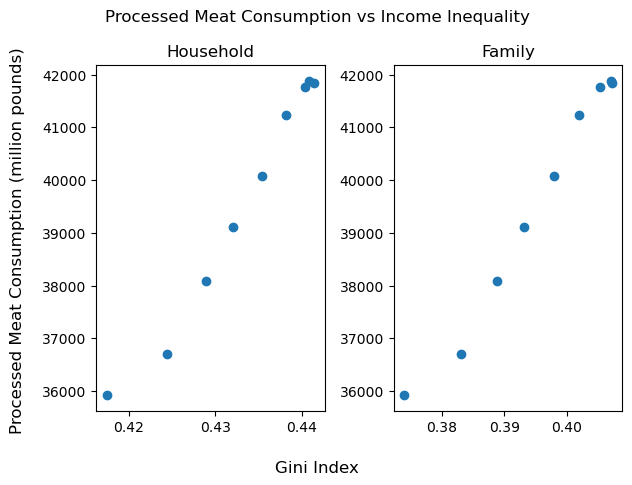

In [29]:
# Q1.1: processed meat consumption vs income inequality (Gini index)
year_consumption = {}
for year in range(2014, 2023):
    consumption = prod_store_no_meat_type[prod_store_no_meat_type["Year"] == year]["Consumption"].sum()
    year_consumption[year] = consumption

print(pearsonr(list(gini_index_year_household.values()), list(year_consumption.values())))
print(pearsonr(list(gini_index_year_family.values()), list(year_consumption.values())))

fig, axs = plt.subplots(1, 2)
axs[0].scatter(list(gini_index_year_household.values()), list(year_consumption.values()))
axs[0].set_title("Household")

axs[1].scatter(list(gini_index_year_family.values()), list(year_consumption.values()))
axs[1].set_title("Family")

fig.supxlabel("Gini Index")
fig.supylabel("Processed Meat Consumption (million pounds)")
fig.suptitle("Processed Meat Consumption vs Income Inequality")

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()

PearsonRResult(statistic=0.535069660423662, pvalue=0.137699783480845)


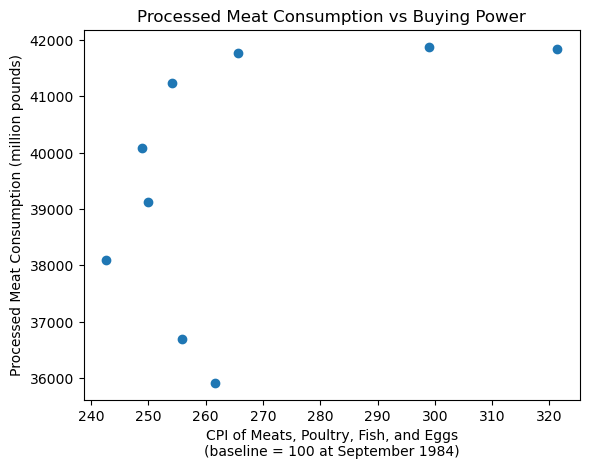

In [30]:
# Q1.2: processed meat consumption vs buying power (CPI)
year_consumption, year_cpi = {}, {}
for year in range(2014, 2023):
    consumption = prod_store_no_meat_type[prod_store_no_meat_type["Year"] == year]["Consumption"].sum()
    year_consumption[year] = consumption

    cpi = cpi_meat_poultry[(cpi_meat_poultry["year"] == year) & (cpi_meat_poultry["period"] == 12)]["value"].values[0]
    year_cpi[year] = cpi

print(pearsonr(list(year_cpi.values()), list(year_consumption.values())))

plt.scatter(list(year_cpi.values()), list(year_consumption.values()))
plt.xlabel("CPI of Meats, Poultry, Fish, and Eggs\n(baseline = 100 at September 1984)")
plt.ylabel("Processed Meat Consumption (million pounds)")
plt.title("Processed Meat Consumption vs Buying Power")
plt.show()

PearsonRResult(statistic=-0.10699809703943214, pvalue=0.7840941541164549)


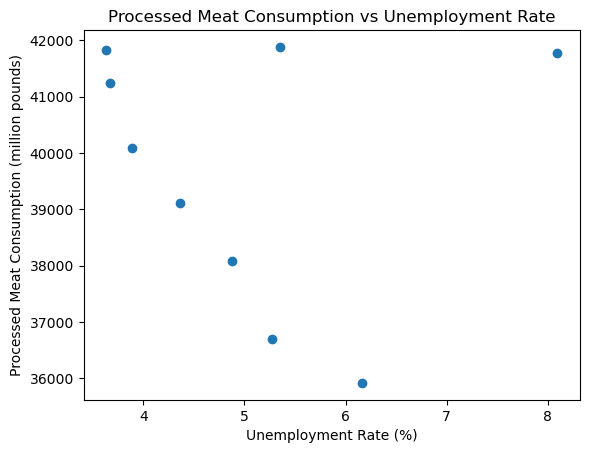

In [31]:
# Q3: unemployment rate vs processed meat consumption
year_unemployment = {}
for year in range(2014, 2023):
    unemployment_rate = unemployment[unemployment["DATE"].str[:4].astype(int) == year]["UNRATE"].mean()
    year_unemployment[year] = unemployment_rate

print(pearsonr(list(year_unemployment.values()), list(year_consumption.values())))

plt.scatter(list(year_unemployment.values()), list(year_consumption.values()))
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Processed Meat Consumption (million pounds)")
plt.title("Processed Meat Consumption vs Unemployment Rate")
plt.show()

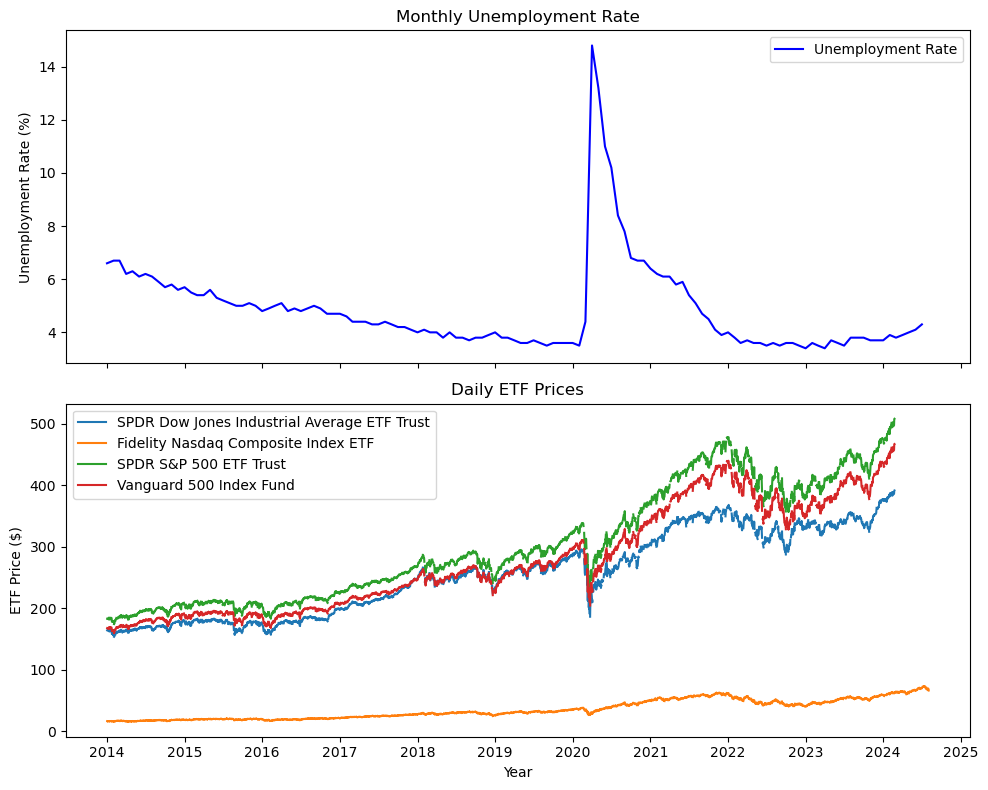

In [32]:
# unemployment rate plotted against ETFs prices (i.e., general representation of stock market)

dates_unemployment = pd.date_range(start='2014-01-01', periods=127, freq='MS')
unemployment_rate = pd.Series(unemployment["UNRATE"].values, index=dates_unemployment)
unemployment_df = pd.DataFrame({'Unemployment Rate': unemployment_rate})

stocks_new = pd.read_csv("all_stock_and_etfs.csv", sep=',', header=0, index_col=None)

dates_stock1 = stocks_new[(stocks_new["Ticker_Symbol"] == "DIA") &
                          (stocks_new["Date-Time"].str[:4].astype(int) >= 2014)]["Date-Time"].values
stock_prices1 = pd.Series(stocks_new[(stocks_new["Ticker_Symbol"] == "DIA") &
                                     (stocks_new["Date-Time"].str[:4].astype(int) >= 2014)]["Close"].values, index=dates_stock1)

# TODO: ONEQ data has significant problem: from some date, the stock price is multiplied by 10 until some date in 2021
# use external source: https://finance.yahoo.com/quote/ONEQ/history/?period1=1388793600&period2=1722764687

ONEQ = pd.read_csv("ONEQ.csv", sep=',', header=0, index_col=None)

dates_stock2 = ONEQ[(ONEQ["Date"].str[:4].astype(int) >= 2014)]["Date"].values
stock_prices2 = pd.Series(ONEQ[(ONEQ["Date"].str[:4].astype(int) >= 2014)]["Close"].values, index=dates_stock2)

dates_stock3 = stocks_new[(stocks_new["Ticker_Symbol"] == "SPY") &
                          (stocks_new["Date-Time"].str[:4].astype(int) >= 2014)]["Date-Time"].values
stock_prices3 = pd.Series(stocks_new[(stocks_new["Ticker_Symbol"] == "SPY") &
                                     (stocks_new["Date-Time"].str[:4].astype(int) >= 2014)]["Close"].values, index=dates_stock3)

dates_stock4 = stocks_new[(stocks_new["Ticker_Symbol"] == "VOO") &
                          (stocks_new["Date-Time"].str[:4].astype(int) >= 2014)]["Date-Time"].values
stock_prices4 = pd.Series(stocks_new[(stocks_new["Ticker_Symbol"] == "VOO") &
                                     (stocks_new["Date-Time"].str[:4].astype(int) >= 2014)]["Close"].values, index=dates_stock4)

stock_prices_df = pd.DataFrame({'SPDR Dow Jones Industrial Average ETF Trust': stock_prices1,
                                'Fidelity Nasdaq Composite Index ETF': stock_prices2,
                                'SPDR S&P 500 ETF Trust': stock_prices3,
                                'Vanguard 500 Index Fund': stock_prices4})

unemployment_df.index = pd.to_datetime(unemployment_df.index)
stock_prices_df.index = pd.to_datetime(stock_prices_df.index)

complete_date_range = pd.date_range(start=stock_prices_df.index.min(), end=stock_prices_df.index.max(), freq='D')

stock_prices_df = stock_prices_df.reindex(complete_date_range, fill_value=np.nan)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].plot(unemployment_df.index, unemployment_df['Unemployment Rate'], color='blue', label='Unemployment Rate')
axs[0].set_title('Monthly Unemployment Rate')
axs[0].set_ylabel('Unemployment Rate (%)')
axs[0].legend()

for i in range(4):
    axs[1].plot(stock_prices_df.index, stock_prices_df.iloc[:, i], label=stock_prices_df.columns[i])
    axs[1].set_title('Daily ETF Prices')
    axs[1].set_ylabel('ETF Price ($)')
    axs[1].legend()

    from matplotlib.dates import AutoDateLocator, AutoDateFormatter

    locator = AutoDateLocator(minticks=10, maxticks=20)
    formatter = AutoDateFormatter(locator)
    axs[1].xaxis.set_major_locator(locator)
    axs[1].xaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

### Predictive Model

#### Data Preparation

In [62]:
def prepare_data(stock_dict: dict):
    target = list(stock_dict.values())

    features = {"Gini_index": [],                           # ACS dataset - income part
                "Meat Consumption": [],                     # Meat production dataset
                "CPI": [],                                  # CPI dataset
                "unemployment": [],                         # Unemployment rate dataset
                "N_students_obesity": [], 
                "N_students_physical_education": [], 
                "N_students_soda": [],                      # Obesity & physical dataset
                "N_adults_no_physical_activity": [], 
                "N_adults_obesity": [],
                "Coffee": [], 
                "Sugar": [],                                # Commodity price dataset
                "Corn": [],
                "High price": [], 
                "Low price": [],                            # Stock dataset - prices at other time points
                "Open price": [],
                "Mean traded volume": []}                   # Stock dataset - volume traded    

    data_year_month = []
    for k in stock_dict.keys():
        _, year, month = k

        data_year_month.append((year, month))

        features["Gini_index"].append(gini_index_year_household[year])
        features["Meat Consumption"].append(prod_store_no_meat_type[(prod_store_no_meat_type["Year"] == year) & 
                                                                    (prod_store_no_meat_type["Month"] == month)]["Consumption"].values[0])
        features["CPI"].append(cpi_meat_poultry[(cpi_meat_poultry["year"] == year) & (cpi_meat_poultry["period"] == month)]["value"].values[0])
        
        features["unemployment"].append(unemployment[(unemployment["DATE"].str[:4].astype(int) == year) & 
                                                     (unemployment["DATE"].str[5:7].astype(int) == month)]["UNRATE"].values[0])

        features["N_students_obesity"].append(question_final_df[(question_final_df["Year"] == year) & 
                                                                (question_final_df["Month"] == month) & 
                                                                (question_final_df["Question"] == "Number of students in grades 9-12 who have obesity")]["Value"].values[0])
        features["N_students_physical_education"].append(question_final_df[(question_final_df["Year"] == year) & 
                                                                           (question_final_df["Month"] == month) &
                                                                           (question_final_df["Question"] == "Number of students in grades 9-12 who participate in daily physical education")]["Value"].values[0])
        features["N_students_soda"].append(question_final_df[(question_final_df["Year"] == year) & 
                                                             (question_final_df["Month"] == month) &
                                                             (question_final_df["Question"] == "Number of students in grades 9-12 who drank regular soda/pop at least one time per day")]["Value"].values[0])
        features["N_adults_no_physical_activity"].append(question_final_df[(question_final_df["Year"] == year) &
                                                                           (question_final_df["Month"] == month) &
                                                                           (question_final_df["Question"] == "Number of adults who engage in no leisure-time physical activity")]["Value"].values[0])
        features["N_adults_obesity"].append(question_final_df[(question_final_df["Year"] == year) & 
                                                              (question_final_df["Month"] == month) &
                                                              (question_final_df["Question"] == "Number of adults aged 18 years and older who have obesity")]["Value"].values[0])
        features["Coffee"].append(commodities[(commodities["Commodity"] == "Coffee") & 
                                              (commodities["Date-Time"].str[:7] == f"{year}-{str(month).zfill(2)}")]["Value"].values[0])
        features["Sugar"].append(commodities[(commodities["Commodity"] == "Sugar") & 
                                             (commodities["Date-Time"].str[:7] == f"{year}-{str(month).zfill(2)}")]["Value"].values[0])
        features["Corn"].append(commodities[(commodities["Commodity"] != "Sugar") &
                                            (commodities["Commodity"] != "Coffee") & 
                                            (commodities["Date-Time"].str[:7] == f"{year}-{str(month).zfill(2)}")]["Value"].values[0])

        features["High price"].append(stocks_month_high[k])
        features["Low price"].append(stocks_month_low[k])
        features["Open price"].append(stocks_month_open[k])
        features["Mean traded volume"].append(mean_volumn_month[k])

    
    return pd.DataFrame(features), np.array(target), data_year_month

In [63]:
def split_data(features, target, year_month):
    train_mask = [True if k < (2021, 1) else False for k in year_month]
    test_mask = [True if k >= (2021, 1) else False for k in year_month]
    
    train_features, train_target = features[train_mask], target[train_mask]
    test_features, test_target = features[test_mask], target[test_mask]
    
    return train_features, train_target, test_features, test_target

#### 1. Prediction of McDonald's stock price

In [64]:
MCD_dict = {k: v for k, v in stocks_month_close.items() if k[0] == "MCD"}
MCD_features, MCD_target, data_year_month_MCD = prepare_data(MCD_dict)

In [65]:
MCD_baseline = np.mean(MCD_target == 0) ** 2 + np.mean(MCD_target == 1) ** 2 + np.mean(MCD_target == -1) ** 2
print(MCD_baseline)

0.5084019204389574


In [66]:
MCD_X_train, MCD_y_train, MCD_X_test, MCD_y_test = split_data(MCD_features, MCD_target, data_year_month_MCD)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
MCD_X_train = scaler.fit_transform(MCD_X_train)
MCD_X_test = scaler.transform(MCD_X_test)

In [67]:
from sklearn.linear_model import LogisticRegression

logistic_MCD = LogisticRegression(random_state=42)
logistic_MCD.fit(MCD_X_train, MCD_y_train)
print(logistic_MCD.score(MCD_X_test, MCD_y_test))

0.7083333333333334


In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_MCD = RandomForestClassifier(n_estimators=200, random_state=42)
rf_MCD.fit(MCD_X_train, MCD_y_train)
print(rf_MCD.score(MCD_X_test, MCD_y_test))

0.9166666666666666


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_MCD = KNeighborsClassifier()
knn_MCD.fit(MCD_X_train, MCD_y_train)
print(knn_MCD.score(MCD_X_test, MCD_y_test))

0.6666666666666666


In [71]:
from sklearn.svm import SVC

svc_MCD = SVC(random_state=42, kernel='poly', degree=3, C=1)
svc_MCD.fit(MCD_X_train, MCD_y_train)
print(svc_MCD.score(MCD_X_test, MCD_y_test))

0.9166666666666666


In [111]:
from sklearn.neural_network import MLPClassifier

mlp_MCD = MLPClassifier(random_state=42, max_iter=3000, activation='identity')
mlp_MCD.fit(MCD_X_train, MCD_y_train)
print(mlp_MCD.score(MCD_X_test, MCD_y_test))

0.8333333333333334


#### 2. Prediction of Hershey's stock price

In [74]:
HSY_dict = {k: v for k, v in stocks_month_close.items() if k[0] == "HSY"}
HSY_features, HSY_target, data_year_month_HSY = prepare_data(HSY_dict)

In [81]:
HSY_baseline = np.mean(HSY_target == 0) ** 2 + np.mean(HSY_target == 1) ** 2 + np.mean(HSY_target == -1) ** 2
print(HSY_baseline)

0.513888888888889


In [75]:
HSY_X_train, HSY_y_train, HSY_X_test, HSY_y_test = split_data(HSY_features, HSY_target, data_year_month_HSY)

scaler = StandardScaler()
HSY_X_train = scaler.fit_transform(HSY_X_train)
HSY_X_test = scaler.transform(HSY_X_test)

In [76]:
logistic_HSY = LogisticRegression(random_state=42)
logistic_HSY.fit(HSY_X_train, HSY_y_train)
print(logistic_HSY.score(HSY_X_test, HSY_y_test))

0.8333333333333334


In [77]:
rf_HSY = RandomForestClassifier(random_state=42)
rf_HSY.fit(HSY_X_train, HSY_y_train)
print(rf_HSY.score(HSY_X_test, HSY_y_test))

0.9583333333333334


In [78]:
knn_HSY = KNeighborsClassifier()
knn_HSY.fit(HSY_X_train, HSY_y_train)
print(knn_HSY.score(HSY_X_test, HSY_y_test))

0.7916666666666666


In [79]:
svc_HSY = SVC(random_state=42)
svc_HSY.fit(HSY_X_train, HSY_y_train)
print(svc_HSY.score(HSY_X_test, HSY_y_test))

0.7083333333333334


In [82]:
mlp_HSY = MLPClassifier(random_state=42, max_iter=1000)
mlp_HSY.fit(HSY_X_train, HSY_y_train)
print(mlp_HSY.score(HSY_X_test, HSY_y_test))

0.8333333333333334


#### 3. Predict Coca-Cola's stock price

In [83]:
COKE_dict = {k: v for k, v in stocks_month_close.items() if k[0] == "COKE"}
COKE_features, COKE_target, data_year_month_COKE = prepare_data(COKE_dict)

In [84]:
COKE_baseline = np.mean(COKE_target == 0) ** 2 + np.mean(COKE_target == 1) ** 2 + np.mean(COKE_target == -1) ** 2
print(COKE_baseline)

0.5015432098765432


In [85]:
COKE_X_train, COKE_y_train, COKE_X_test, COKE_y_test = split_data(COKE_features, COKE_target, data_year_month_COKE)

scaler = StandardScaler()
COKE_X_train = scaler.fit_transform(COKE_X_train)
COKE_X_test = scaler.transform(COKE_X_test)

In [86]:
logistic_COKE = LogisticRegression(random_state=42)
logistic_COKE.fit(COKE_X_train, COKE_y_train)
print(logistic_COKE.score(COKE_X_test, COKE_y_test))

0.875


In [87]:
rf_COKE = RandomForestClassifier(random_state=42)
rf_COKE.fit(COKE_X_train, COKE_y_train)
print(rf_COKE.score(COKE_X_test, COKE_y_test))

0.8333333333333334


In [88]:
knn_COKE = KNeighborsClassifier()
knn_COKE.fit(COKE_X_train, COKE_y_train)
print(knn_COKE.score(COKE_X_test, COKE_y_test))

0.75


In [91]:
svc_COKE = SVC(random_state=42, kernel='poly', degree=3, C=1)
svc_COKE.fit(COKE_X_train, COKE_y_train)
print(svc_COKE.score(COKE_X_test, COKE_y_test))

0.75


In [112]:
mlp_COKE = MLPClassifier(random_state=42, max_iter=1000, activation='identity')
mlp_COKE.fit(COKE_X_train, COKE_y_train)
print(mlp_COKE.score(COKE_X_test, COKE_y_test))

0.7916666666666666


#### Predict ConAgra Foods stock price

In [92]:
CAG_dict = {k: v for k, v in stocks_month_close.items() if k[0] == "CAG"}
CAG_features, CAG_target, data_year_month_CAG = prepare_data(CAG_dict)

In [93]:
CAG_baseline = np.mean(CAG_target == 0) ** 2 + np.mean(CAG_target == 1) ** 2 + np.mean(CAG_target == -1) ** 2
print(CAG_baseline)

0.49434156378600835


In [94]:
CAG_X_train, CAG_y_train, CAG_X_test, CAG_y_test = split_data(CAG_features, CAG_target, data_year_month_CAG)

scaler = StandardScaler()
CAG_X_train = scaler.fit_transform(CAG_X_train)
CAG_X_test = scaler.transform(CAG_X_test)

In [95]:
logistic_CAG = LogisticRegression(random_state=42)
logistic_CAG.fit(CAG_X_train, CAG_y_train)
print(logistic_CAG.score(CAG_X_test, CAG_y_test))

0.6666666666666666


In [96]:
rf_CAG = RandomForestClassifier(random_state=42)
rf_CAG.fit(CAG_X_train, CAG_y_train)
print(rf_CAG.score(CAG_X_test, CAG_y_test))

0.9166666666666666


In [97]:
knn_CAG = KNeighborsClassifier()
knn_CAG.fit(CAG_X_train, CAG_y_train)
print(knn_CAG.score(CAG_X_test, CAG_y_test))

0.6666666666666666


In [99]:
svm_CAG = SVC(random_state=42, kernel='poly', degree=3, C=1)
svm_CAG.fit(CAG_X_train, CAG_y_train)
print(svm_CAG.score(CAG_X_test, CAG_y_test))

0.6666666666666666


In [116]:
mlp_CAG = MLPClassifier(random_state=42, max_iter=1000, activation='relu')
mlp_CAG.fit(CAG_X_train, CAG_y_train)
print(mlp_CAG.score(CAG_X_test, CAG_y_test))

0.6666666666666666


#### Predict SAP stock price

In [101]:
SAP_dict = {k: v for k, v in stocks_month_close.items() if k[0] == "SAP"}
SAP_features, SAP_target, data_year_month_SAP = prepare_data(SAP_dict)

In [102]:
SAP_baseline = np.mean(SAP_target == 0) ** 2 + np.mean(SAP_target == 1) ** 2 + np.mean(SAP_target == -1) ** 2
print(SAP_baseline)

0.5061728395061729


In [103]:
SAP_X_train, SAP_y_train, SAP_X_test, SAP_y_test = split_data(SAP_features, SAP_target, data_year_month_SAP)

scaler = StandardScaler()
SAP_X_train = scaler.fit_transform(SAP_X_train)
SAP_X_test = scaler.transform(SAP_X_test)

In [104]:
logistic_SAP = LogisticRegression(random_state=42)
logistic_SAP.fit(SAP_X_train, SAP_y_train)
print(logistic_SAP.score(SAP_X_test, SAP_y_test))

0.8333333333333334


In [105]:
rf_SAP = RandomForestClassifier(random_state=42)
rf_SAP.fit(SAP_X_train, SAP_y_train)
print(rf_SAP.score(SAP_X_test, SAP_y_test))

1.0


In [106]:
knn_SAP = KNeighborsClassifier()
knn_SAP.fit(SAP_X_train, SAP_y_train)
print(knn_SAP.score(SAP_X_test, SAP_y_test))

0.7083333333333334


In [108]:
svm_SAP = SVC(random_state=42, kernel='poly', degree=3, C=1)
svm_SAP.fit(SAP_X_train, SAP_y_train)
print(svm_SAP.score(SAP_X_test, SAP_y_test))

0.875


In [117]:
mlp_SAP = MLPClassifier(random_state=42, max_iter=1000, activation='identity')
mlp_SAP.fit(SAP_X_train, SAP_y_train)
print(mlp_SAP.score(SAP_X_test, SAP_y_test))

0.8333333333333334
